## Data620 Assignment Data Sets
#### Gabriel Santos 
#### Date: 03-02-2023 


Here is a dataset that shows a simple 2-node network:  the attendance of 18 Southern Women at 14 social events:

1.Brief Description:
( http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#davis ).Small “musty” datasets like that from this 1941 study have proven very valuable in testing and comparing new network algorithms.

2.Dataset: ( http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/davis.dat)

3.Python code to create dataset:
( https://networkx.github.io/documentation/stable/auto_examples/algorithms/plot_davis_club.html) 

What can you infer about the relationships between (1) the women, and (2) the social events? 

In [25]:
import pandas as pd
import networkx as nx
import math
import matplotlib.pyplot as plt
import networkx.algorithms.bipartite as bipartite

#### Process Network
The code below was taken from: https://networkx.github.io/documentation/stable/auto_examples/algorithms/plot_davis_club.html.

The davis_southern_women_graph() is is a bipartite graph, and create a graph object that represents the bipartite network of 18 Southern Women at 14 social events.


In [26]:
G = nx.davis_southern_women_graph()
women = G.graph['top']
clubs = G.graph['bottom']

In [27]:
print(women)

['Evelyn Jefferson', 'Laura Mandeville', 'Theresa Anderson', 'Brenda Rogers', 'Charlotte McDowd', 'Frances Anderson', 'Eleanor Nye', 'Pearl Oglethorpe', 'Ruth DeSand', 'Verne Sanderson', 'Myra Liddel', 'Katherina Rogers', 'Sylvia Avondale', 'Nora Fayette', 'Helen Lloyd', 'Dorothy Murchison', 'Olivia Carleton', 'Flora Price']


In [28]:
print(clubs)

['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14']


In [29]:
print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, clubs))

Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1


#### Graph: projected_graph

Returns the projection of B onto one of its node sets. Project bipartite graph onto the women nodes. The women are connected if they attend the same social club.

In [6]:
W = bipartite.projected_graph(G, women) 

Below is the number of connections each woman has to other women. When there is a connection between two women, it means that they are co-members of the same club.

In [7]:
print("#Friends, Member")
for w in women:
     print('%d %s' % (W.degree(w), w))

#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price


bipartite.weighted_projected_graph(B, nodes, ratio=False)
Returns a weighted projection of B onto one of its node sets.

The weighted projected graph is the projection of the bipartite network B onto the specified nodes with weights representing the number of shared neighbors or the ratio between actual shared neighbors and possible shared neighbors if ratio=True. 

The nodes retain their attributes and are connected in the resulting graph if they have an edge to a common node in the original graph.

Project bipartite graph onto women nodes keeping number of co-occurence.

The degree computed is weighted and counts the total number of shared contacts


In [8]:
W = bipartite.weighted_projected_graph(G, women)

In [9]:
print("#Friend meetings, Member")
for w in women:
    print('%d %s' % (W.degree(w, weight='weight'), w))

#Friend meetings, Member
50 Evelyn Jefferson
45 Laura Mandeville
57 Theresa Anderson
46 Brenda Rogers
24 Charlotte McDowd
32 Frances Anderson
36 Eleanor Nye
31 Pearl Oglethorpe
40 Ruth DeSand
38 Verne Sanderson
33 Myra Liddel
37 Katherina Rogers
46 Sylvia Avondale
43 Nora Fayette
34 Helen Lloyd
24 Dorothy Murchison
14 Olivia Carleton
14 Flora Price


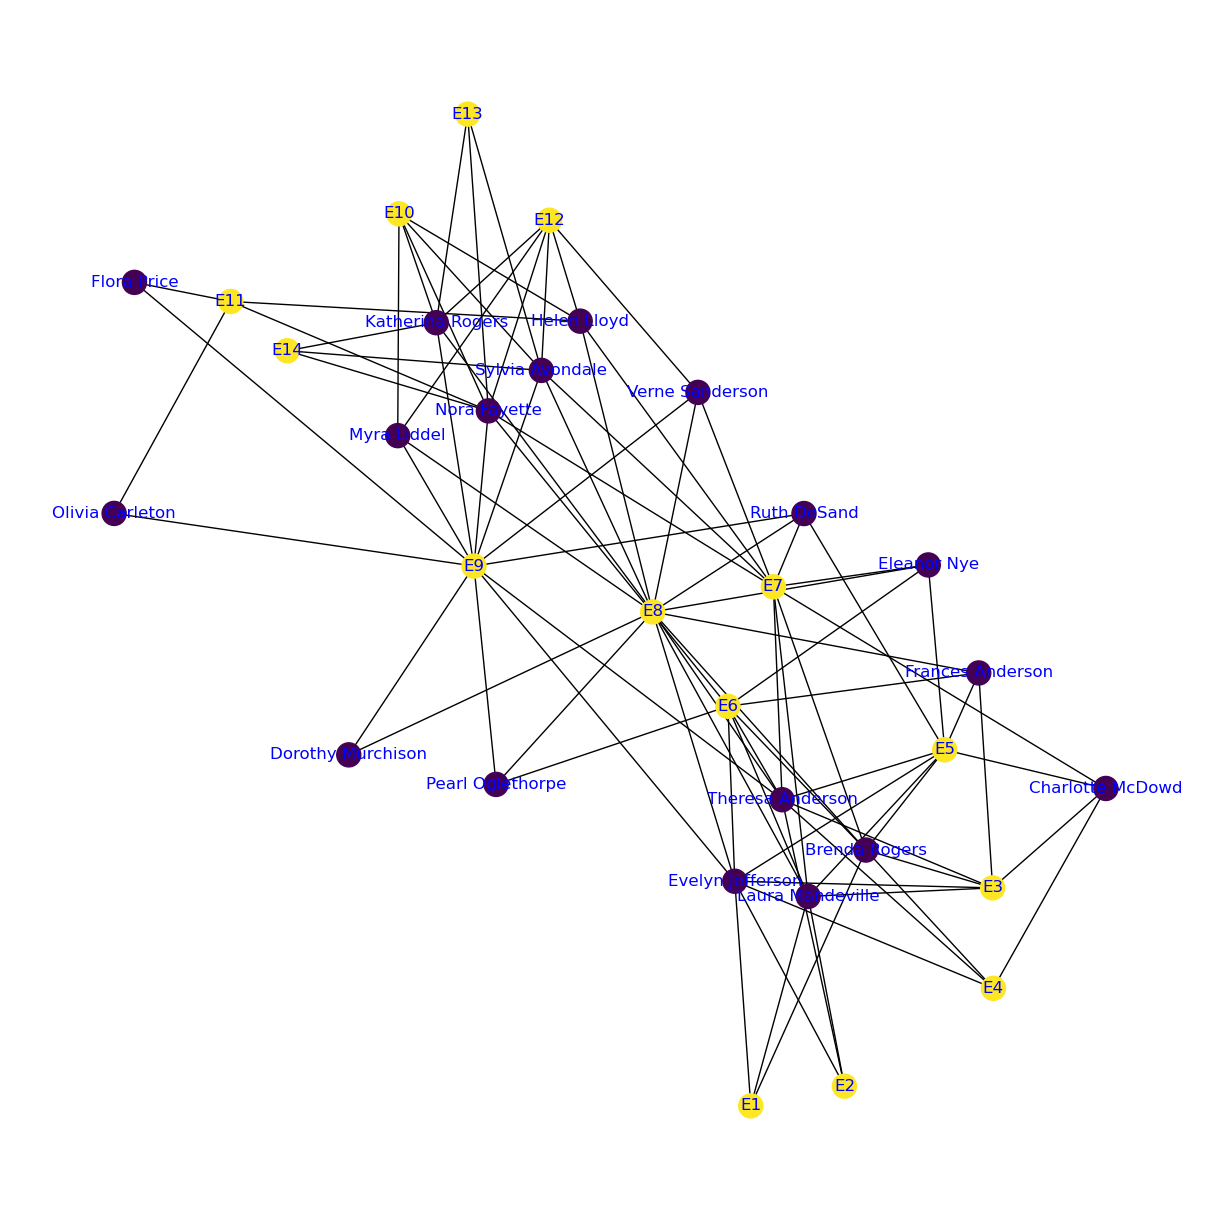

In [38]:
plt.figure(3,figsize=(12,12)) 

val_map = {'E1': 1.0, 'E2': 1.0,'E3': 1.0, 'E4': 1.0,  'E5': 1.0,  'E6': 1.0,  'E7': 1.0,  'E8': 1.0,  'E9': 1.0,
            'E10': 1.0,  'E11': 1.0, 'E12': 1.0, 'E13': 1.0,  'E14': 1.0}
values = [val_map.get(node, 0.5) for node in G.nodes()]
nx.draw(G, cmap=plt.get_cmap('viridis'), node_color=values, with_labels=True, font_color='blue')
plt.show()

#### What can you infer about the relationships between (1) the women, and (2) the social events?

First I am going to graph the Affiliation Network of Women and then the Affiliation Network of Clubs.

#### Affiliation Network of Women

In the next graph we can see the connection between two women, the connection between women is stronger when they are co-members of several clubs. The thicker the line, the stronger the connection between two women.

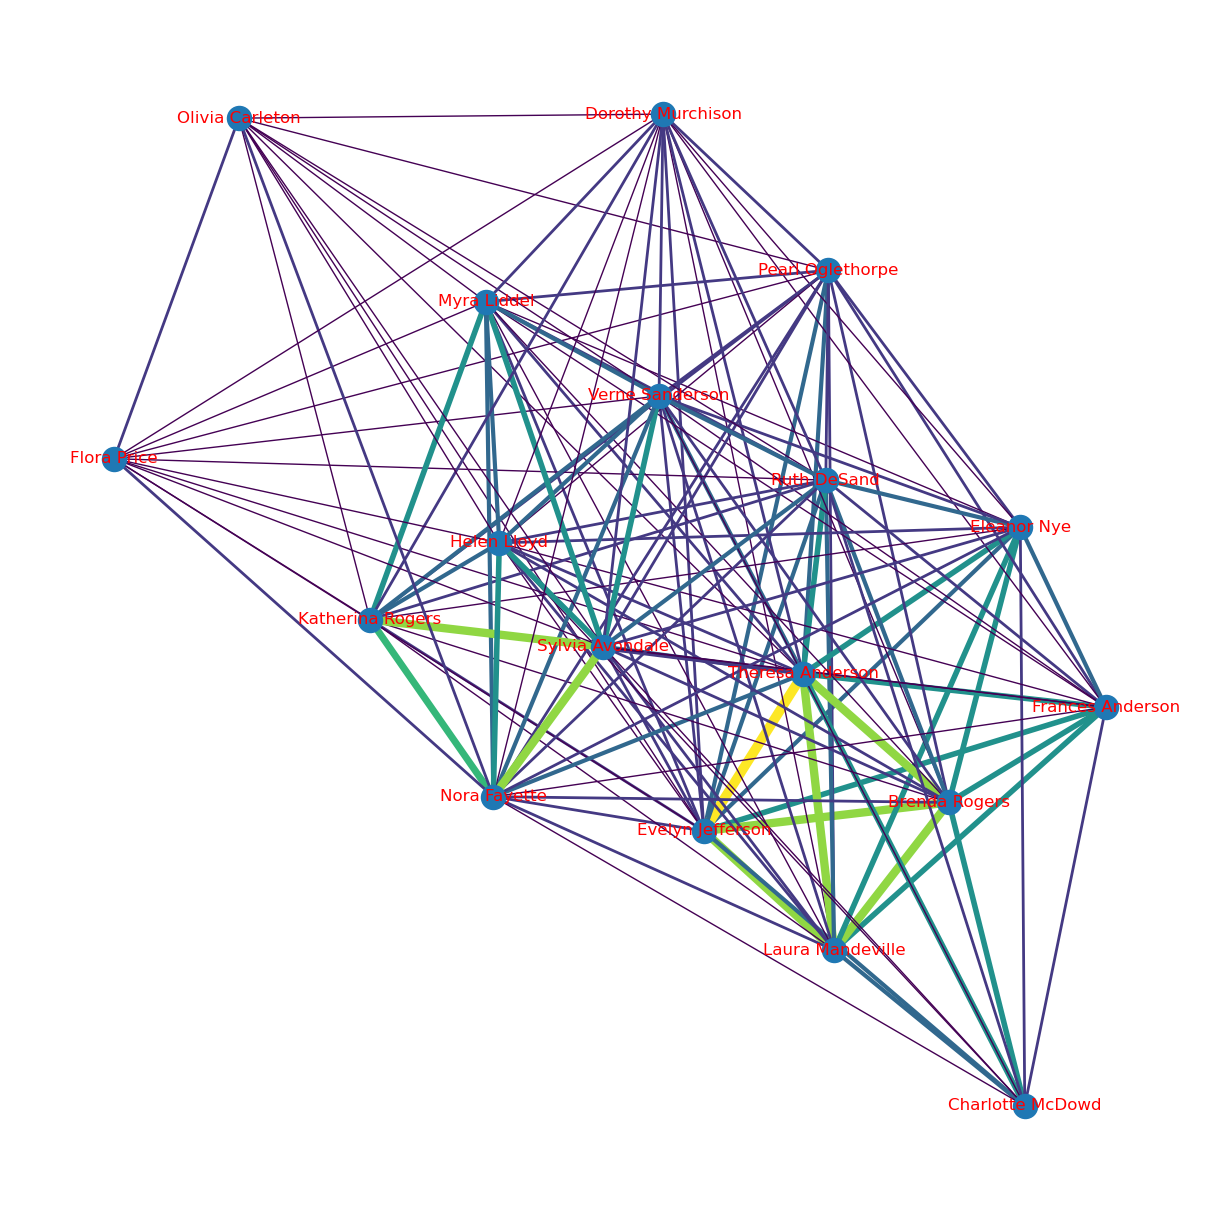

In [49]:
plt.figure(3,figsize=(12,12)) 
womennet=bipartite.weighted_projected_graph(G, women, ratio=False)
weights=[edata['weight'] for f,t,edata in womennet.edges(data=True)]
nx.draw(womennet, width=weights, edge_color=weights, with_labels=True, font_color='red')

In the following list we can see the Top 10 Strong Relationships Among Women

In [44]:
for a, b, data in sorted(womennet.edges(data=True), key=lambda x: x[2]['weight'], reverse = True)[0:10]:
    print('{a} ---- {b}, {w}'.format(a=a, b=b, w=data['weight']))

Evelyn Jefferson ---- Theresa Anderson, 7
Evelyn Jefferson ---- Laura Mandeville, 6
Evelyn Jefferson ---- Brenda Rogers, 6
Laura Mandeville ---- Brenda Rogers, 6
Laura Mandeville ---- Theresa Anderson, 6
Theresa Anderson ---- Brenda Rogers, 6
Katherina Rogers ---- Sylvia Avondale, 6
Sylvia Avondale ---- Nora Fayette, 6
Katherina Rogers ---- Nora Fayette, 5
Evelyn Jefferson ---- Frances Anderson, 4


#### Affiliation Network of Clubs

In the following graph, we can see which clubs share many members. The thicker the line between two clubs, the stronger the relationship.

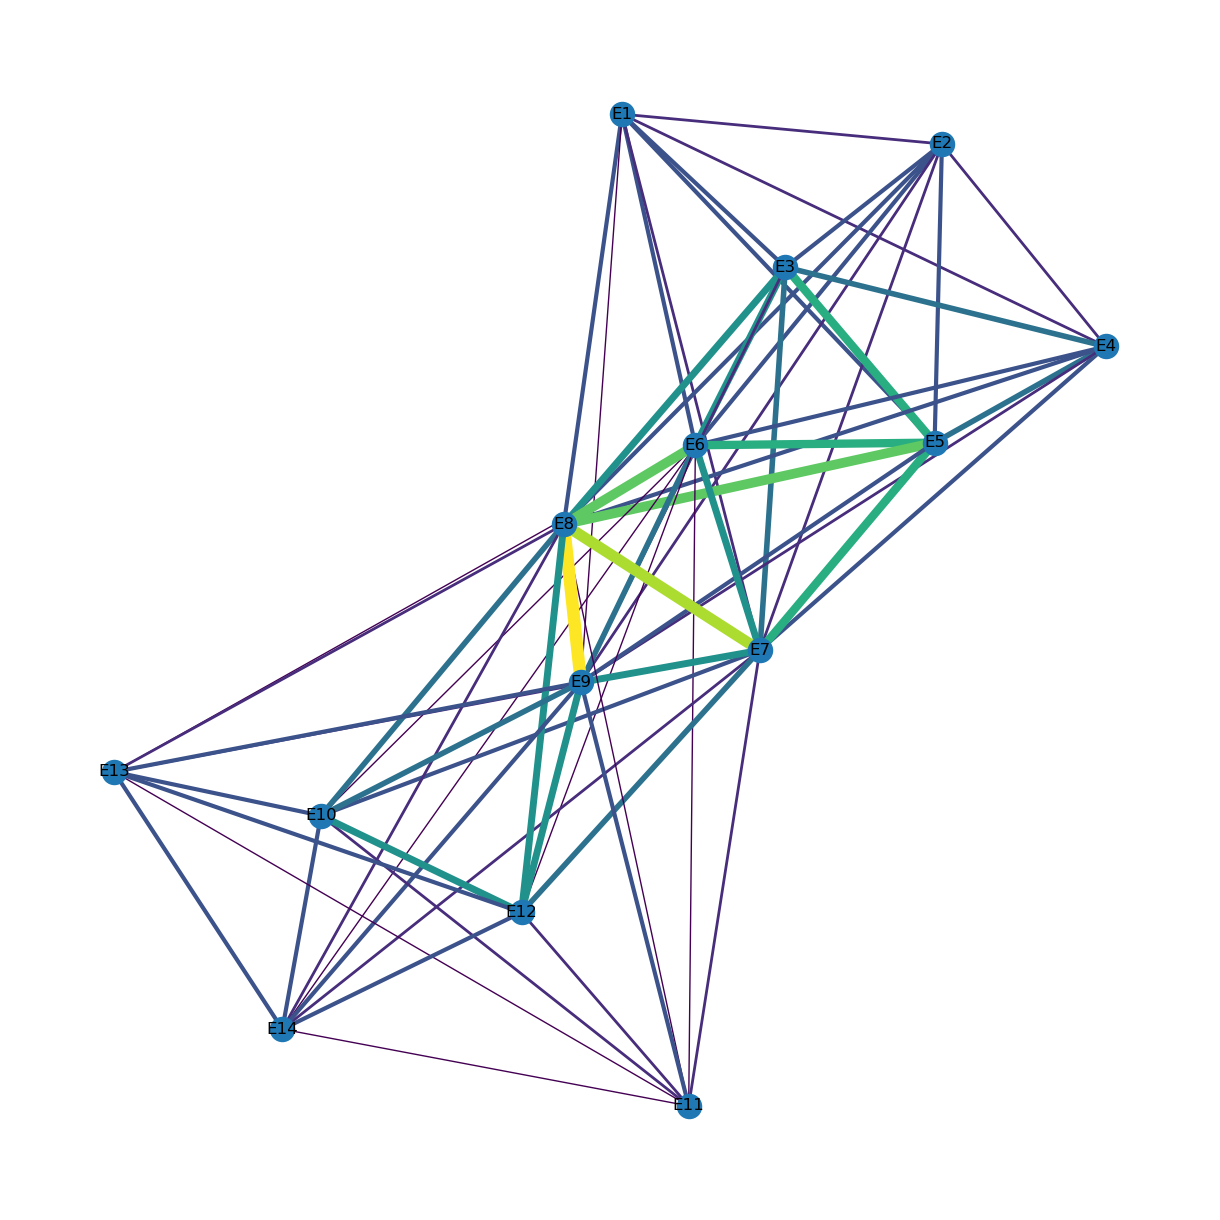

In [48]:
plt.figure(3,figsize=(12,12)) 
clubnet=bipartite.weighted_projected_graph(G, clubs, ratio=False)
weights=[edata['weight'] for f,t,edata in clubnet.edges(data=True)]
nx.draw(clubnet,width=weights, edge_color=weights, with_labels=True, font_color='black')

In the following list we can see the Top 10 Strongest Club Relationships.

In [14]:
for a, b, data in sorted(clubnet.edges(data=True), key=lambda x: x[2]['weight'], reverse = True)[0:10]:
    print('{a} ----- {b}, {w}'.format(a=a, b=b, w=data['weight']))

E8 ----- E9, 9
E7 ----- E8, 8
E5 ----- E8, 7
E6 ----- E8, 7
E3 ----- E5, 6
E5 ----- E6, 6
E5 ----- E7, 6
E3 ----- E6, 5
E3 ----- E8, 5
E6 ----- E7, 5


#### Women with Most Club Memberships
In the following list we can see which women have the highest number of club memberships.
The women who are affiliated with the most clubs are Evelyn Jefferson, Theresa Anderson and Nora Fayette. They are affiliated with 8 clubs.

In [15]:
deg = nx.degree(G)
sorted(list(deg)[0:18], key=lambda x: x[1], reverse=True)

[('Evelyn Jefferson', 8),
 ('Theresa Anderson', 8),
 ('Nora Fayette', 8),
 ('Laura Mandeville', 7),
 ('Brenda Rogers', 7),
 ('Sylvia Avondale', 7),
 ('Katherina Rogers', 6),
 ('Helen Lloyd', 5),
 ('Charlotte McDowd', 4),
 ('Frances Anderson', 4),
 ('Eleanor Nye', 4),
 ('Ruth DeSand', 4),
 ('Verne Sanderson', 4),
 ('Myra Liddel', 4),
 ('Pearl Oglethorpe', 3),
 ('Dorothy Murchison', 2),
 ('Olivia Carleton', 2),
 ('Flora Price', 2)]

According to the graphs we can infer that Evelyn Jefferson is connected with all the other women based on their club affiliations. She is also among the women with the most club memberships. She is strongly connected to Theresa Anderson and Brenda Rogers.

In [16]:
W = bipartite.projected_graph(G, women)
[n for n in W.neighbors('Evelyn Jefferson')]

['Laura Mandeville',
 'Frances Anderson',
 'Theresa Anderson',
 'Nora Fayette',
 'Katherina Rogers',
 'Sylvia Avondale',
 'Pearl Oglethorpe',
 'Flora Price',
 'Brenda Rogers',
 'Charlotte McDowd',
 'Dorothy Murchison',
 'Ruth DeSand',
 'Olivia Carleton',
 'Myra Liddel',
 'Eleanor Nye',
 'Helen Lloyd',
 'Verne Sanderson']

Evelyn Jefferson is affiliated with 8 clubs, which could be the following:

In [17]:
[n for n in G.neighbors('Evelyn Jefferson')]

['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E8', 'E9']

According to the list below, we can see that the club with the largest number of members is E8, it has 14 members. Then there is the E9 club with 12 members and third is E7 with 10 members.

In [18]:
sorted(list(deg)[18:32], key=lambda x: x[1], reverse=True)

[('E8', 14),
 ('E9', 12),
 ('E7', 10),
 ('E5', 8),
 ('E6', 8),
 ('E3', 6),
 ('E12', 6),
 ('E10', 5),
 ('E4', 4),
 ('E11', 4),
 ('E1', 3),
 ('E2', 3),
 ('E13', 3),
 ('E14', 3)]

I will add the members of club E8 and E9 to identify if there is a woman who is not affiliated with either of these two clubs. E8 and E9 are the clubs with the largest number of members.

In [19]:
E8E9 = set([n for n in G.neighbors('E8')] + [n for n in G.neighbors('E9')])

In [50]:
all_members = set(list(G.nodes())[0:18])

In [51]:
print(E8E9)

{'Laura Mandeville', 'Frances Anderson', 'Theresa Anderson', 'Myra Liddel', 'Katherina Rogers', 'Sylvia Avondale', 'Nora Fayette', 'Pearl Oglethorpe', 'Flora Price', 'Brenda Rogers', 'Dorothy Murchison', 'Ruth DeSand', 'Olivia Carleton', 'Evelyn Jefferson', 'Eleanor Nye', 'Helen Lloyd', 'Verne Sanderson'}


In [52]:
print(all_members)

{'Laura Mandeville', 'Frances Anderson', 'Theresa Anderson', 'Myra Liddel', 'Katherina Rogers', 'Sylvia Avondale', 'Nora Fayette', 'Pearl Oglethorpe', 'Flora Price', 'Brenda Rogers', 'Charlotte McDowd', 'Dorothy Murchison', 'Ruth DeSand', 'Olivia Carleton', 'Evelyn Jefferson', 'Eleanor Nye', 'Helen Lloyd', 'Verne Sanderson'}


The only member that's not participating in E8 and E9 is Charlotte McDowd

In [23]:
print(all_members^E8E9)

{'Charlotte McDowd'}


#### Conclusion

Evelyn Jefferson is connected to all the other women based on club affiliations. She is also among the women with the most club memberships, she is the woman who has the strongest relationship according to the affiliations of the clubs she has. Evelyn Jefferson is a member of 8 out of the 14 social clubs. Evelyn is connected to all the other women.

The club with the largest number of members is E8, with 14 women.

Between the club E8 and E9, they have in common 17 members of the 18 women in total. The only woman who is not a member of these two clubs is Charlotte McDowd.